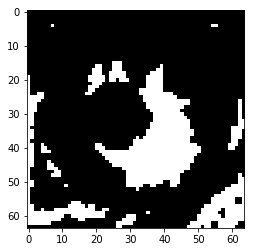

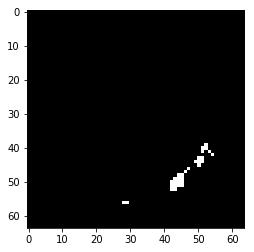

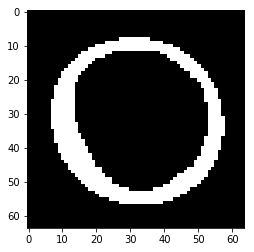

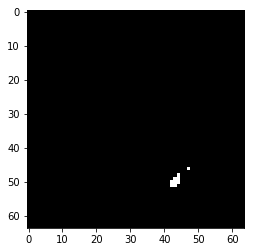

In [6]:
import gzip
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob

base_dir = 'D:/DeepLearn/output'
file_path = os.path.join(base_dir, 'submit_2019-05-29_03h51.csv.gz')

with gzip.open(file_path) as f:
    features_train = pd.read_csv(f)

n = 2
features_example = features_train['rle_mask'][n]

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# Show an example
mask = rle_decode(features_example, [64,64])
plt.imshow(mask,'gray')
plt.show() # Show raw Predicted Label

input_dir = 'D:/Deeplearn/input'
testing_labels = glob(os.path.join(input_dir, 'TestingLabel_Select/*'))

trut = np.array(Image.open(testing_labels[n]))
trut[trut == 1] = 0
trut[trut == 2] = 255
plt.imshow(trut,'gray')
plt.show() # Show Truth

testing_masks = glob(os.path.join(input_dir, 'TestingMask_Select/*'))
test_mask = np.array(Image.open(testing_masks[n]))
test_mask_vis = np.zeros(test_mask.shape)
test_mask_vis[test_mask == 1] = 255
plt.imshow(test_mask_vis, 'gray')
plt.show() # Show Mask

maskout = np.multiply(mask, test_mask)
plt.imshow(maskout, 'gray')
plt.show() # Show Masked Pred

In [3]:
features_train

,img,rle_mask
0,132.tif,2 4 65 9 79 1 123 1 129 11 193 11 257 11 321 1...
1,134.tif,9 56 74 51 127 2 137 56 199 58 262 59 326 44 3...
2,139.tif,706 1 769 1 833 1 897 3 961 3 988 1 1025 1 104...
3,14.tif,257 2 321 1 385 1 449 1 451 1 513 3 577 3 608 ...
4,150.tif,65 1 71 1 257 1 259 1 321 1 327 1 385 1 387 3 ...
5,154.tif,10 55 76 5 82 47 140 53 204 8 213 44 268 53 33...
6,168.tif,1383 1 1441 2 1506 2 1512 1 1570 3 1574 3 1620...
7,181.tif,28 1 75 3 79 1 82 2 89 5 135 2 139 8 153 5 200...
8,19.tif,720 4 776 1 783 6 838 4 845 8 902 4 909 9 963 ...
9,193.tif,67 1 74 2 77 1 83 1 138 1 141 2 201 2 318 1 32...


In [4]:
testing_masks[n]

'D:/Deeplearn/input\\TestingMask_Select\\139.tif'

In [7]:
np.sum(maskout)
im1 = np.asarray(trut>1).astype(np.bool)
im2 = np.asarray(maskout).astype(np.bool)
smooth = 1.
intersection = np.logical_and(im1, im2)
(2. * intersection.sum() + smooth) / (im1.sum() + im2.sum() + smooth)

0.4634146341463415

## Rebuild the network (If run length decode doesn't work)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

BN_EPS = 1e-4
# Rebuild the network

class ConvBnRelu2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, dilation=1, stride=1, groups=1, is_bn=True,
                 is_relu=True):
        super(ConvBnRelu2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding, stride=stride,
                              dilation=dilation, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, eps=BN_EPS)
        self.relu = nn.ReLU(inplace=True)
        if is_bn is False: self.bn = None
        if is_relu is False: self.relu = None

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x


## original 3x3 stack filters used in UNet
class StackEncoder(nn.Module):
    def __init__(self, x_channels, y_channels, kernel_size=3):
        super(StackEncoder, self).__init__()
        padding = (kernel_size - 1) // 2
        self.encode = nn.Sequential(
            ConvBnRelu2d(x_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x):
        y = self.encode(x)
        y_small = F.max_pool2d(y, kernel_size=2, stride=2)
        return y, y_small


class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding,
                         dilation=1, stride=1, groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x_big, x):
        N, C, H, W = x_big.size()
        # y = F.upsample(x, size=(H, W), mode='bilinear')
        y = F.interpolate(x, size=(H, W), mode='bilinear')
        y = torch.cat([y, x_big], 1)
        y = self.decode(y)
        return y


# 1024x1024
class UNet1024(nn.Module):
    def __init__(self, in_shape):
        super(UNet1024, self).__init__()
        C, H, W = in_shape
        # assert(C==1)

        # 1024
        self.down1 = StackEncoder(C, 24, kernel_size=3)  # 512
        self.down2 = StackEncoder(24, 64, kernel_size=3)  # 256
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 128
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 64
        # self.down5 = StackEncoder(256, 512, kernel_size=3)  # 32
        # self.down6 = StackEncoder(512, 1024, kernel_size=3)  # 16

        self.center = nn.Sequential(
            # ConvBnRelu2d(1024, 1024, kernel_size=3, padding=1, stride=1),
            ConvBnRelu2d(256, 256, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        # self.up6 = StackDecoder(1024, 1024, 512, kernel_size=3)  # 16
        # self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.up2 = StackDecoder(64, 64, 24, kernel_size=3)  # 256
        self.up1 = StackDecoder(24, 24, 24, kernel_size=3)  # 512
        self.classify = nn.Conv2d(24, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def _crop_concat(self, upsampled, bypass):
        """
         Crop y to the (h, w) of x and concat them.
         Used for the expansive path.
        Returns:
            The concatenated tensor
        """
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))

        return torch.cat((upsampled, bypass), 1)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        #
        down1, out = self.down1(out)  ##;print('down1',down1.size())  #256
        down2, out = self.down2(out)  # ;print('down2',down2.size())  #128
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        # down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        # down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        # out = self.up6(down6, out)
        # out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.up2(down2, out)
        out = self.up1(down1, out)
        # 1024

        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out
    
# 1024x1024
class UNet1024_32(nn.Module):
    def __init__(self, in_shape):
        super(UNet1024_32, self).__init__()
        C, H, W = in_shape
        # assert(C==1)

        # 1024
        self.down1 = StackEncoder(C, 32, kernel_size=3)  # 512
        self.down2 = StackEncoder(32, 64, kernel_size=3)  # 256
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 128
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 64
        # self.down5 = StackEncoder(256, 512, kernel_size=3)  # 32
        # self.down6 = StackEncoder(512, 1024, kernel_size=3)  # 16

        self.center = nn.Sequential(
            # ConvBnRelu2d(1024, 1024, kernel_size=3, padding=1, stride=1),
            ConvBnRelu2d(256, 256, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        # self.up6 = StackDecoder(1024, 1024, 512, kernel_size=3)  # 16
        # self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.up2 = StackDecoder(64, 64, 32, kernel_size=3)  # 256
        self.up1 = StackDecoder(32, 32, 32, kernel_size=3)  # 512
        self.classify = nn.Conv2d(32, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def _crop_concat(self, upsampled, bypass):
        """
         Crop y to the (h, w) of x and concat them.
         Used for the expansive path.
        Returns:
            The concatenated tensor
        """
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))

        return torch.cat((upsampled, bypass), 1)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        #
        down1, out = self.down1(out)  ##;print('down1',down1.size())  #256
        down2, out = self.down2(out)  # ;print('down2',down2.size())  #128
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        # down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        # down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        # out = self.up6(down6, out)
        # out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.up2(down2, out)
        out = self.up1(down1, out)
        # 1024

        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out

## Rebuild the model (If run length decode doesn't work)

In [9]:
import torch
from glob import glob
import os
import numpy as np
from PIL import Image

base_dir = 'D:/DeepLearn/output'
file_path = glob(os.path.join(base_dir, 'models/*'))
model_file = file_path[-1] # The variable that needs to be changed

model = UNet1024_32((1, 64, 64))
model_dict = torch.load(model_file)
model.load_state_dict(model_dict)
model.cuda() # Push to GPU
model.eval() # turning off BatchNorm

UNet1024_32(
  (down1): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
    )
  )
  (down2): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

## Prediction (If run length decode doesn't work)

In [10]:
def rescale_img(image, mean=0, std=1.):
    """
    Transforms an image to a tensor
    Args:
        image (np.ndarray): A RGB array image
        mean: The mean of the image values
        std: The standard deviation of the image values

    Returns:
        tensor: A Pytorch tensor
    """
    image = image.astype(np.float32)
    mean = np.mean(image)
    std = np.std(image)
    image = (image - mean) / std
    # image = image.transpose((2, 0, 1))
    # image = np.expand_dims(image, axis=0)  # For gray-scale image
    return image

def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    # if im1.sum() == 0 or im2.sum() == 0:
    #      smooth = 10
    # else:
    #      smooth = 1
    smooth = 1
    return (2. * intersection.sum() + smooth) / (im1.sum() + im2.sum() + smooth)

input_dir = 'D:/Deeplearn/input'
input_files = glob(os.path.join(input_dir, 'TestingData_Select/*'))
base_dir = 'D:/DeepLearn/output'
in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel_Select'))
test_glob = glob(os.path.join(in_dir, '*'))
preds = list()
out_dir = os.path.join(base_dir, 'PredLabel')

for i, input_file in enumerate(input_files):
    img = np.array(Image.open(input_file))
    img = rescale_img(img)

    # make example a torch tensor
    value = torch.from_numpy(img)

    # then put it on the GPU, make it float and insert a fake batch dimension
    test_value = torch.autograd.Variable(value.cuda())
    test_value = test_value.float()
    test_value = test_value.unsqueeze(0).unsqueeze(0) # [1, 1, 64, 64]

    # pass it through the model
    prediction = model(test_value)

    # get the result out and reshape it
    probs = torch.sigmoid(prediction)
    cpu_pred = probs.cpu()
    result = cpu_pred.data.numpy()
    im_pred = np.reshape(result, (64,64))
    
    # calculate Dice-Similarity
    im_test = Image.open(test_glob[i])
    im_test = np.array(im_test)
    maskout = np.array(Image.open(testing_masks[i]))
    
    im_test[im_test <= 1.5] = 0;
    im_test[im_test > 1.5] = 1;
    im_pred = np.multiply(im_pred, maskout)
    
    im_pred = im_pred > 0.5
    dice_coef = dice(im_pred, im_test)
    if not pd.isnull(dice_coef):
        preds.append(dice_coef)
    else:
        preds.append(1)
        
    out_file = os.path.join(out_dir, input_file.split('\\')[-1])
    img = Image.fromarray(im_pred, 'L')
    img.save(out_file)
    # print(input_file.split('\\')[-1])

print(preds)
nonz = list(np.nonzero(preds))[0]

nonz_preds = list()
for i in nonz:
    nonz_preds.append(preds[i])
print(np.mean(preds))
np.median(nonz_preds)

C:\Users\ZhangX1\AppData\Local\Continuum\anaconda3\envs\JamesZhang\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


[0.7009345794392523, 0.911864406779661, 0.4634146341463415, 0.9183673469387755, 0.8874458874458875, 0.7678571428571429, 0.4838709677419355, 0.8108882521489972, 0.9342507645259939, 0.8133748055987559, 0.8658536585365854, 0.5962566844919787, 0.7291666666666666, 0.9318885448916409, 0.8957446808510638, 0.8472998137802608, 0.8260869565217391, 0.9104803493449781, 0.926865671641791, 0.8618307426597582, 0.8523391812865497, 0.12941176470588237, 0.7086092715231788, 0.9429223744292238, 0.9113737075332349, 0.9319727891156463, 0.7715289982425307, 0.9008746355685131, 0.9186893203883495, 0.9085714285714286, 0.8579234972677595, 0.857981220657277, 0.7123893805309734, 0.7983193277310925, 0.9685714285714285, 0.7039274924471299, 0.9380952380952381, 0.5745614035087719, 0.8762886597938144, 0.915, 0.5943396226415094, 0.7857142857142857]
0.8010273234603099


0.8579523589625182

## Show image (If run length decode doesn't work)

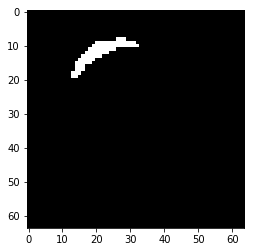

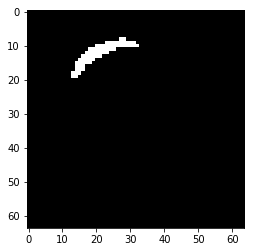

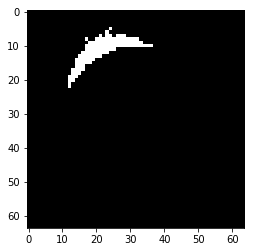

In [11]:
plt.imshow(im_pred, 'gray')
plt.show()

array_bn = np.zeros(im_pred.shape)
array_bn[im_pred > 0.5] = 1
array_bn[im_pred <= 0.5] = 0
array_bn = np.multiply(array_bn, test_mask)

plt.imshow(array_bn, 'gray')
plt.show()

plt.imshow(im_test, 'gray')
plt.show()

Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid
Predicted
Truth
Overlaid


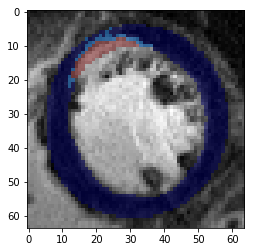

In [12]:
import os
import numpy as np
from PIL import Image
    
def overlay_infarct(test_file, mask_file, img_file, pred_file, fname, shape, out_dir):
    
    img = np.array(Image.open(img_file))
    test_mask = np.array(Image.open(test_file))
    test_mask[test_mask <= 1.5] = 0;
    test_mask[test_mask > 1.5] = 1;
        
    mask = np.array(Image.open(pred_file))
    test_myo = np.array(Image.open(mask_file))
    

    overlay = test_mask + test_myo + mask*3
    test_mask = test_mask*2 + test_myo
    mask = mask*2 + test_myo
    
    test_masked = np.ma.masked_where(test_mask == 0, test_mask)
    masked = np.ma.masked_where(mask == 0, mask)
    overlaid = np.ma.masked_where(overlay == 0, overlay)
    
    print('Predicted')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(masked, vmin=1, vmax=3, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'pred_'+fnames[i])
    plt.savefig(out_file)

    print('Truth')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(test_masked, vmin=1, vmax=3, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'trut_'+fnames[i])
    plt.savefig(out_file)
    
    print('Overlaid')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(overlaid, vmin=1, vmax=5, cmap='jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'overlay_'+fnames[i])
    plt.savefig(out_file)
    
shape = [64, 64]
nums = len(features_train['img'])
out_dir = os.path.join(base_dir, 'OutputImages_' + model_file.split('\\')[-1].split('_', 1)[-1])
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel_Select'))
test_glob = glob(os.path.join(in_dir, '*'))
mask_glob = glob(os.path.join(os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingMask_Select')), '*'))
fnames = [f.split('\\')[-1] for f in mask_glob]
img_glob = glob(os.path.join(os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingData_Select')), '*'))
pred_glob = glob(os.path.join(base_dir, 'PredLabel/*'))

for i, img_file in enumerate(img_glob):
    test_file = test_glob[i]
    mask_file = mask_glob[i]
    pred_file = pred_glob[i]
    fname = fnames[i]
    overlay_infarct(test_file, mask_file, img_file, pred_file, fname, shape, out_dir)

### Copy LabelDataTotal to TestingLabel

In [19]:
import os 
from glob import glob
import shutil

input_dir = 'D:\Deeplearn\input'
testing_data = glob(os.path.join(input_dir, 'TestingData\*'))

for test in testing_data:
    fname = test.split('\\')[-1]
    shutil.copyfile(os.path.join(input_dir, 'LabelDataTotal', fname), os.path.join(input_dir, 'TestingLabel', fname))  